## 5 steps for multivariate LR 

### Multivariate with 2 features/variables

1. Import packages and classes needed.
2. Feed in the data (including transformations if necessary).
3. Create the regression model and fit it with the data.
4. Use the results of the model fitting to verify if the it is satisfactory.
5. Make predictions with the model.

In [13]:
# step 1: import classes and packages
import numpy as np
from sklearn.linear_model import LinearRegression

# pandas for manipulation
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# step 2: Feed in the data

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

#convert into numpy arrays
x, y = np.array(x), np.array(y)

#output arrays
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [15]:
# step 3: Create the model and fit the dataset for training
model=LinearRegression().fit(x,y)

In [16]:
# Step 4: Results

#Model accuracy
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

#model θ0
print('intercept:', model.intercept_)

#model θ1
print('slope/gradient:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope/gradient: [0.44706965 0.25502548]


In [17]:
# Step 5: Predictions from new data
x_new = np.arange(10).reshape((-1, 2))
print('New Dataset:\n', x_new)

y_new = model.predict(x_new)
print('Predictions of new dataset:\n', y_new)

New Dataset:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Predictions of new dataset:
 [ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Visualising data

In [18]:
# visualising trainig dataset with predictions using dataframe
df_s = pd.DataFrame(x, columns=['x1','x2'])
df_s['y'] = pd.Series(y)
print(df_s)

   x1  x2   y
0   0   1   4
1   5   1   5
2  15   2  20
3  25   5  14
4  35  11  32
5  45  15  22
6  55  34  38
7  60  35  43


C:\Users\Sarvesh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


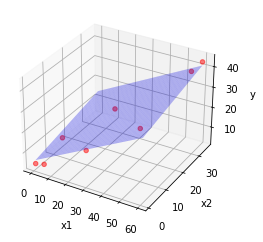

In [20]:
# plotting a graph
x_surface, y_surface = np.meshgrid(np.linspace(df_s.x1.min(), df_s.x1.max(), 100)
,np.linspace(df_s.x2.min(), df_s.x2.max(), 100))
only_x = pd.DataFrame({'x1':x_surface.ravel(), 'x2':y_surface.ravel()})
y_pred = model.predict(only_x)
y_pred=np.array(y_pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_s['x1'],df_s['x2'],df_s['y'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surface,y_surface,y_pred.reshape(x_surface.shape), color='b', alpha=0.3)

#label the axis
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

#display plot
plt.show()